In [1]:
import os
import geopandas as gpd
from datetime import datetime

os.chdir('..')
from braidedSP.river import River

In [2]:
mask_path = r".\data\watermasks\S2_Niger_WaterMask_NDWI_01_12_21.tif"
odir = r".\data\odir"

# read shapefile for starting line
river_bounds = gpd.read_file(r".\data\priors\niger_river_braided_channel_test.shp")

starting_line = gpd.read_file(r".\data\priors\starting_line.shp")
main_centerline = gpd.read_file(r".\data\priors\main_centerline.shp")

In [3]:
niger = River(
    name='Niger',
    aoi=river_bounds,
    outdir=odir
)

In [4]:
niger.add_mask(mask_path, datetime(2021, 12, 1))

In [ ]:
niger.process_masks(
    {
        'dilate': 2,
        'gauss' : 0.5,
        'fill_hole_size' : 1000,
        'show_progress' : True,
        'save_progress' : False
    }
)

Processing masks: 100%|██████████| 1/1 [00:59<00:00, 59.61s/it]


In [ ]:
niger.generate_centerlines(
    {
        'show_progress' : True
    }
)


Generating centerlines: 100%|██████████| 1/1 [03:31<00:00, 211.97s/it]

275


In [ ]:
niger.trim_centerlines_to_bounds()

270


In [ ]:
niger.merge_short_centerlines(
    {
        'connection_threshold' : 50,
        'similarity_threshold' : 0.7,
        'shortest_centerline' : 2000
    }
)

151


In [ ]:
niger.join_centerlines(
    {
        'starting_line' : starting_line,
        'main_centerline' : main_centerline,
        'search_dist' : 20
    }
)

151


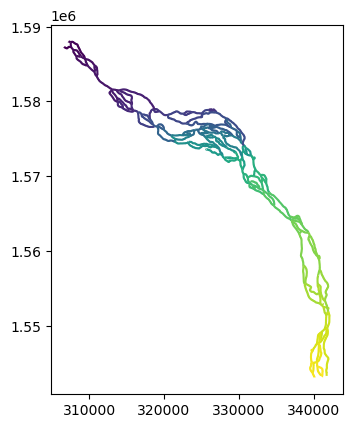

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
niger.centerlines[0].gdf.plot(column='branch_id', ax=ax)
plt.show()